In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import re
import pandas as pd
import spacy
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from IPython.display import display
from wordcloud import WordCloud, STOPWORDS

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/train1.csv",encoding = 'utf-8')

In [ ]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


<ipython-input-48-00f04fdf22d4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


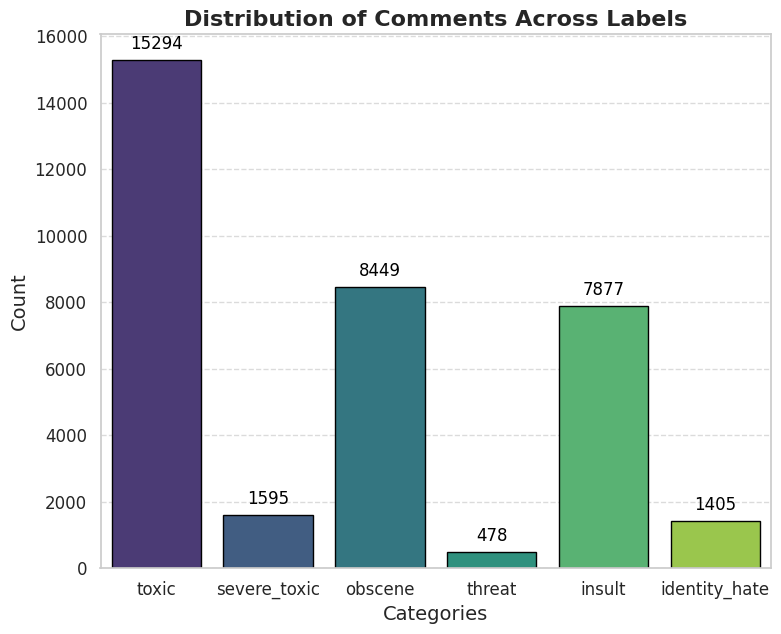

In [ ]:
# Distribution of Comment Labels

# Set a style for the plot
sns.set(style="whitegrid")

# Visualize the distribution of the target labels
plt.figure(figsize=(8, 6.5))
barplot = sns.barplot(
    x=train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum().index,
    y=train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum().values,
    palette='viridis', edgecolor='black'
)

# Add counts on top of each bar
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     fontsize=12, color='black',
                     xytext=(0, 5),  # Adjusts the position of the text
                     textcoords='offset points')

# Enhance title and labels
plt.title("Distribution of Comments Across Labels", fontsize=16, fontweight='bold')
plt.ylabel("Count", fontsize=14)
plt.xlabel("Categories", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
train['is_toxic'] = train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].max(axis=1)


In [ ]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,is_toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


In [ ]:
labels = {0: "non-hate", 1: "hate"}
print(labels)

{0: 'non-hate', 1: 'hate'}


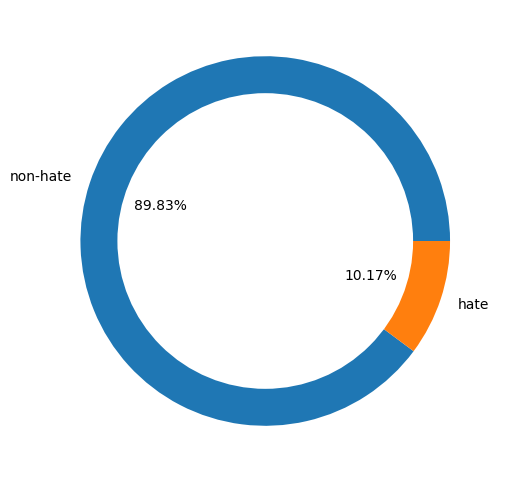

In [ ]:
plt.figure(figsize=(6, 6))

plt.pie(
    train["is_toxic"].value_counts(),
    autopct = "%.2f%%",
    labels = ["non-hate", "hate"]
)


circle = plt.Circle((0,0), 0.80,fc='white')

fig = plt.gcf()
fig.gca().add_artist(circle)

plt.show()

[Text(0.5, 0, 'Number of Tokens'), Text(0, 0.5, 'Number of Observations')]

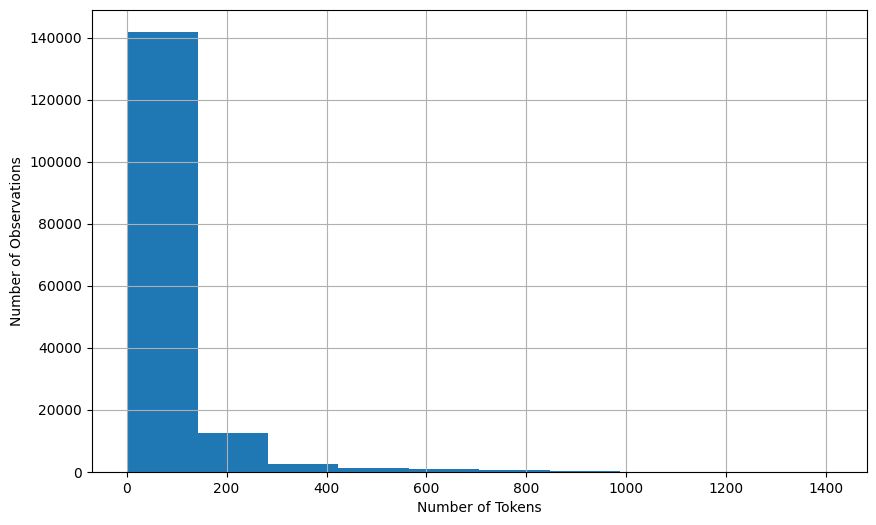

In [ ]:
ax1 = train.comment_text.str.split().map(lambda x: len(x)).hist(figsize=(10, 6))
ax1.set(xlabel="Number of Tokens", ylabel="Number of Observations")

Most of tweets have between 0 and 100 tokens.


Text(0, 0.5, 'Number of Tokens')

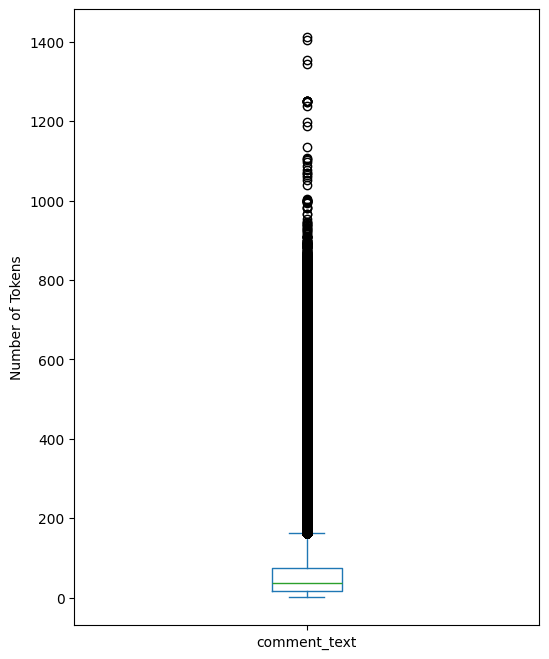

In [ ]:
ax2 = train.comment_text.str.split().map(lambda x: len(x)).plot.box(figsize=(6,8))
ax2.set_ylabel("Number of Tokens")

# **Word Cloud**

In [ ]:
train.shape


(159571, 9)

In [ ]:
train = train.drop('id',axis = 'columns')

1. Checking and dropping duplicates

In [ ]:
train = train.drop_duplicates(keep = 'first')

In [ ]:
train.shape


(159571, 8)

2. Removing user tags
3. Removing non-alphanumeric characters


In [ ]:
def preprocess_tweets(df_series):

    df_series = df_series.str.replace("@user", "", regex=False)

    df_series = df_series.str.replace("[^a-zA-Z0-9 ]", " ")
    return df_series

4. Tokenization for creating corpus.
5. removing stopwords

In [ ]:
def tokenize(sentence, remove_stopwords=False):

    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = sentence.split()
        tokens = [token for token in tokens if not token.lower() in stop_words]
        return tokens

    return sentence.split()

6. Lemmatization and creating word corpus

In [ ]:
def create_corpus(df_series, remove_stopwords=False):

    corpus = []
    lm = WordNetLemmatizer()
    df_series = preprocess_tweets(df_series)

    for tweet in df_series:
        corpus.extend([lm.lemmatize(word) for word in tokenize(tweet, remove_stopwords=remove_stopwords)])

    return corpus

In [ ]:
offensive_corpus = create_corpus(train[train["is_toxic"]==1].comment_text, remove_stopwords=True)
non_offensive_corpus = create_corpus(train[train["is_toxic"]==0].comment_text, remove_stopwords=True)

removing non-ascii characters

In [ ]:
def remove_non_ascii(text):
    return text.encode('ascii', 'ignore').decode('ascii')

In [ ]:
offensive_corpus_removed = [remove_non_ascii(word) for word in offensive_corpus]
non_offensive_corpus_removed = [remove_non_ascii(word) for word in non_offensive_corpus]

Creating word cloud from corpus

In [ ]:
def plot_word_cloud(corpus):

    word_cloud = WordCloud(
        max_words = 100,
        max_font_size = 50,
        collocations = False
    ).generate(str(corpus))

    fig = plt.figure(figsize=(13, 13))
    plt.axis('off')
    plt.imshow(word_cloud)
    plt.plot()

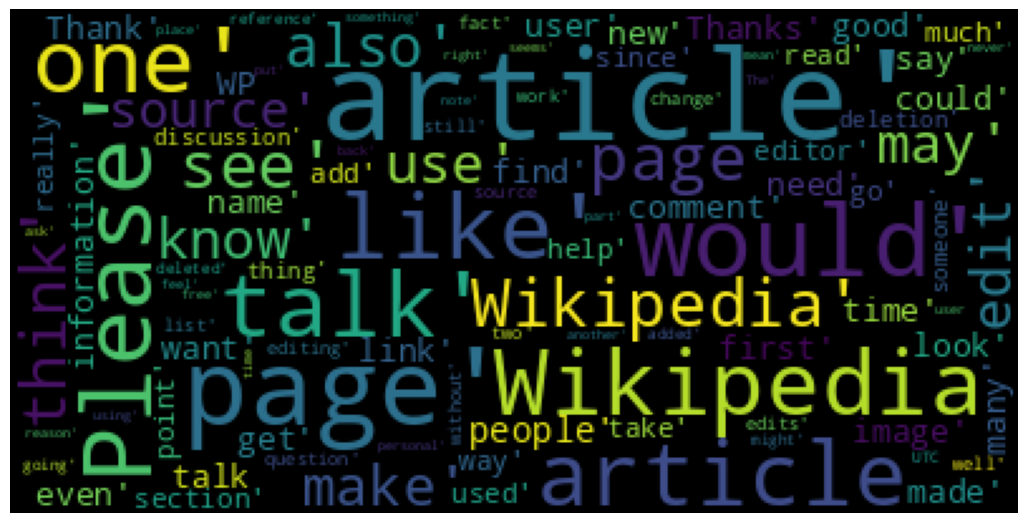

In [ ]:
plot_word_cloud(non_offensive_corpus_removed)

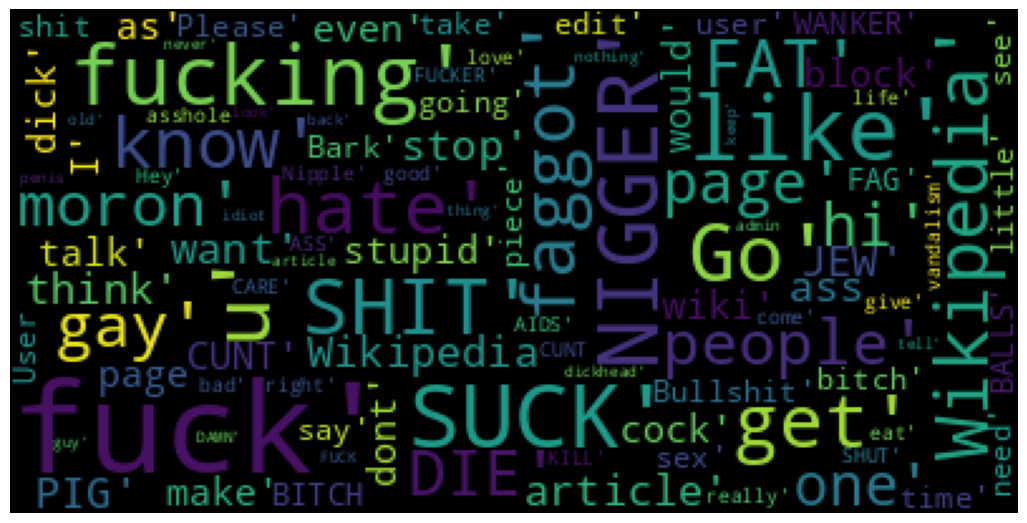

In [ ]:
plot_word_cloud(offensive_corpus_removed)

In [ ]:
def get_hash_tags(df_series):

    hash_tags = []
    for text in df_series:
        hash_tags.extend(re.findall(r'#(\w+)', text))

    return hash_tags

In [ ]:
nonhate_hashtags = get_hash_tags(train[train["is_toxic"]==0]["comment_text"])
hate_hashtags = get_hash_tags(train[train["is_toxic"]==1]["comment_text"])

In [ ]:
nonhate_hashtag_counts = Counter(nonhate_hashtags)
hate_hashtag_counts = Counter(hate_hashtags)

creating a dataframe for hashtags
  

In [ ]:
nonhate_hashtag_counts_df = pd.DataFrame.from_dict(nonhate_hashtag_counts, orient="index").reset_index()
nonhate_hashtag_counts_df.columns = ["hashtag", "count"]
nonhate_hashtag_counts_df.sort_values("count", ascending=False, inplace=True)
display(nonhate_hashtag_counts_df.head())

,hashtag,count
40,F5FFFA,702
43,FFFFFF,244
13,000,237
42,000000,149
10,1,132


In [ ]:
# Create a DataFrame from the dictionary
hate_hashtag_counts_df = (
    pd.DataFrame(list(hate_hashtag_counts.items()), columns=["hashtag", "count"])  # Convert dictionary to DataFrame
    .sort_values("count", ascending=False)  # Sort by count in descending order
    .reset_index(drop=True)  # Reset index after sorting
)

# Display the top entries
display(hate_hashtag_counts_df.head())


,hashtag,count
0,Dive_Right_In_Awardhttp,72
1,REDIRECT,11
2,1,10
3,December_8,5
4,9,4


<ipython-input-30-49a76c398f1d>:3: FutureWarning: using <function <lambda> at 0x7e14c2981d80> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  ax3.set_yticklabels(nonhate_hashtag_counts_df.head(50).agg({"hashtag": lambda x: '#'+x}).values.flatten())


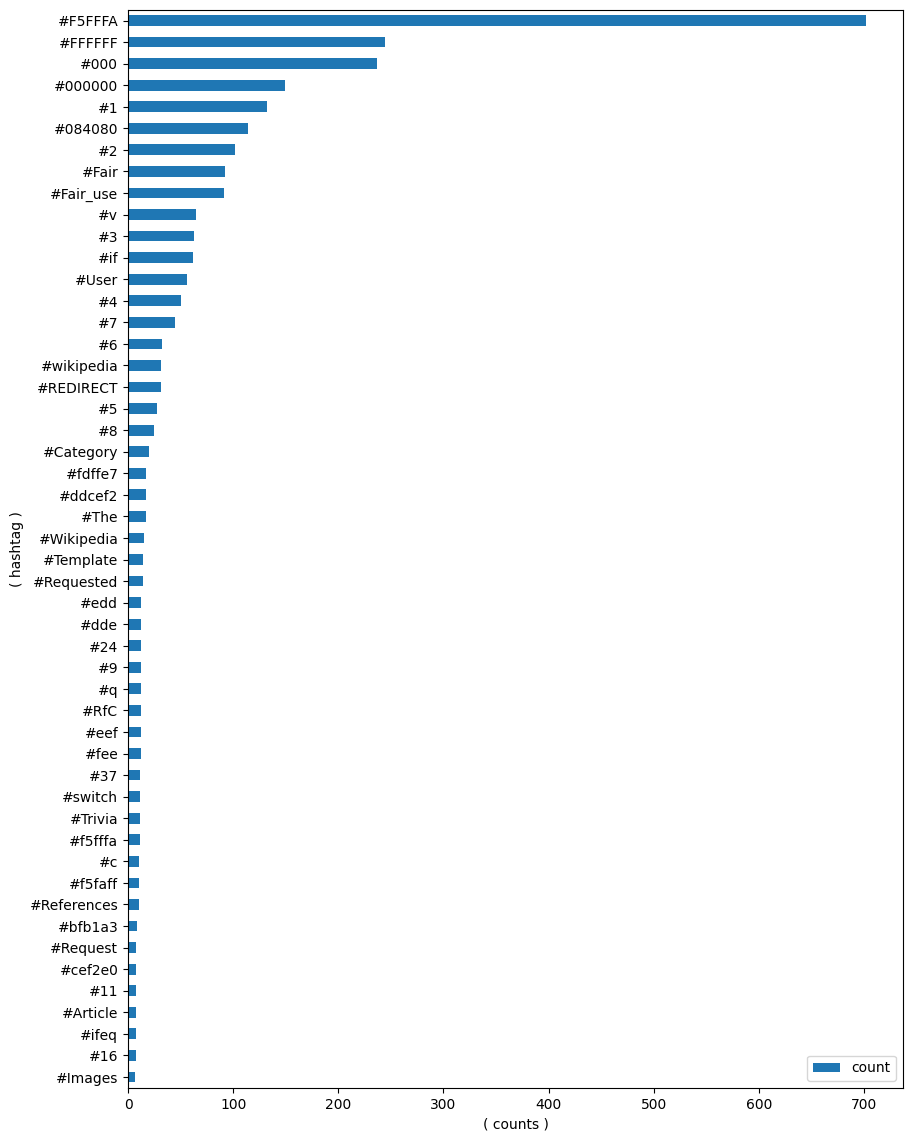

In [ ]:
ax3 = nonhate_hashtag_counts_df.head(50).plot.barh(y="count", figsize=(10, 14))
ax3.set(xlabel="( counts )", ylabel="( hashtag )")
ax3.set_yticklabels(nonhate_hashtag_counts_df.head(50).agg({"hashtag": lambda x: '#'+x}).values.flatten())
ax3.invert_yaxis()
plt.show()

<Figure size 1000x1400 with 0 Axes>

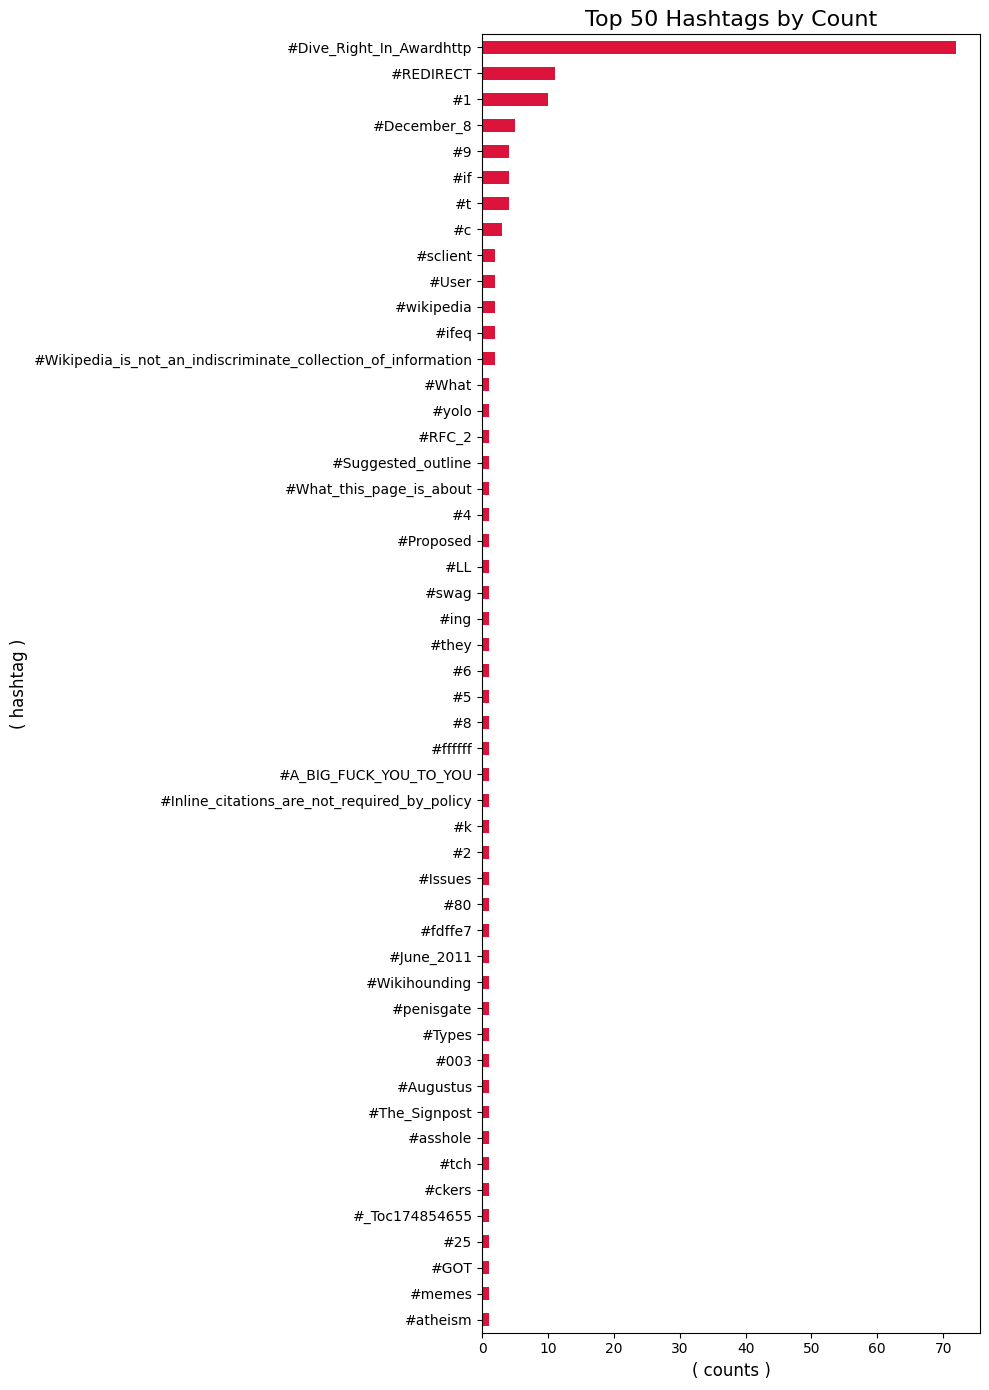

In [ ]:
# Check if the DataFrame has numeric data to plot
if hate_hashtag_counts_df.empty or not pd.api.types.is_numeric_dtype(hate_hashtag_counts_df["count"]):
    print("No hashtags to display.")
else:
    # Plot the horizontal bar chart for the top 50 hashtags
    plt.figure(figsize=(10, 14))
    ax4 = hate_hashtag_counts_df.head(50).plot.barh(
        x="hashtag",  # Use 'hashtag' column for y-axis labels
        y="count",    # Use 'count' column for bar lengths
        figsize=(10, 14),
        color="crimson",
        legend=False
    )

    # Customize the chart
    ax4.set_xlabel("( counts )", fontsize=12)
    ax4.set_ylabel("( hashtag )", fontsize=12)
    ax4.set_title("Top 50 Hashtags by Count", fontsize=16)

    # Prepend '#' to each hashtag for display
    ax4.set_yticklabels(hate_hashtag_counts_df.head(50)["hashtag"].apply(lambda x: f"#{x}"))

    # Invert y-axis to show the highest count at the top
    ax4.invert_yaxis()

    # Show the plot
    plt.tight_layout()
    plt.show()


What proportion of tweets contain a hastag??

In [ ]:
def count_rows_with_hashtag(df_series):

    count = 0
    for tweet in df_series:
        if re.search(r'#(\w+)', tweet):
            count+=1

    return count

# **Preprocessing**

We already showed some of the preprocessing steps we will use above while creating the word corpus for non-hate and hate speech. Here we formalize it step by step and apply it to original train split.


In [ ]:
Word = WordNetLemmatizer()

In [ ]:
def clean(raw):
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub("\n", '', result)
    return result

2. Removing emojis

In [ ]:
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

3. Removing punctuation and symbols

In [ ]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', text)
    return text

4. Converting to lower case


In [ ]:
def lower_case(df):
    df['comment_text'] = df['comment_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

5. Removing stopwords

In [ ]:
def stop_words_remove(df):
    df['comment_text'] = df['comment_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

6. removing '@user'

In [ ]:
def remove_word_user(df):
    df['comment_text'] = df['comment_text'].apply(lambda x: " ".join(x for x in x.split() if x != 'user'))

7. Lemmatization

In [ ]:
def lemmatize(df):
    df['comment_text'] = df['comment_text'].apply(lambda x: " ".join([Word.lemmatize(word) for word in x.split()]))

In [ ]:
def cleaning(df):
    df['comment_text'] = df['comment_text'].apply(clean)
    df['comment_text'] = df['comment_text'].apply(deEmojify)
    df['comment_text'] = df['comment_text'].apply(lambda x: remove_punct(x))
    lower_case(df)
    stop_words_remove(df)
    remove_word_user(df)
    lemmatize(df)

In [ ]:
import string
stop_words = stopwords.words('english')

In [ ]:
cleaning(train)

In [ ]:
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,is_toxic
0,explanationwhy edits made username hardcore me...,0,0,0,0,0,0,0
1,daww match background colour im seemingly stuc...,0,0,0,0,0,0,0
2,hey man im really trying edit war guy constant...,0,0,0,0,0,0,0
3,morei cant make real suggestion improvement wo...,0,0,0,0,0,0,0
4,sir hero chance remember page thats,0,0,0,0,0,0,0


In [ ]:
train['comment_text'][20]

'regarding recent edits please read wpfilmplot editing film article edits simply good entirely many unnecessary detail bad writing please stop damage'